<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


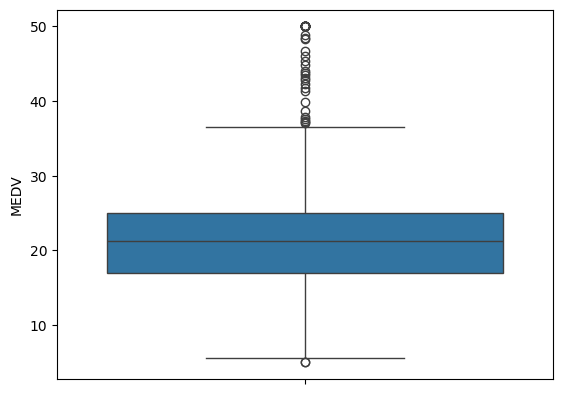

In [8]:
box_medv = sns.boxplot(y='MEDV', data=boston_df)

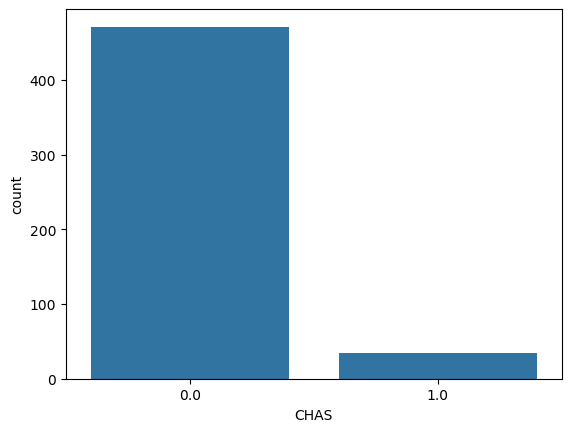

In [14]:
bar_riv = sns.countplot(x="CHAS" , data=boston_df)

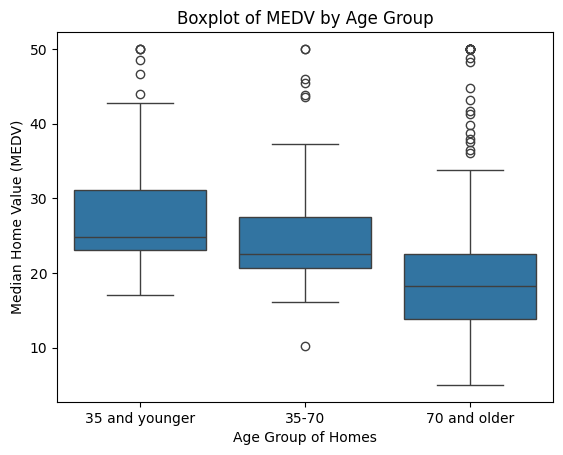

In [15]:
# Discretize AGE into three groups
bins = [0, 35, 70, 100]
labels = ['35 and younger', '35-70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

# Create boxplot for MEDV by AGE group
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)

# Add plot labels
pyplot.xlabel('Age Group of Homes')
pyplot.ylabel('Median Home Value (MEDV)')
pyplot.title('Boxplot of MEDV by Age Group')
pyplot.show()

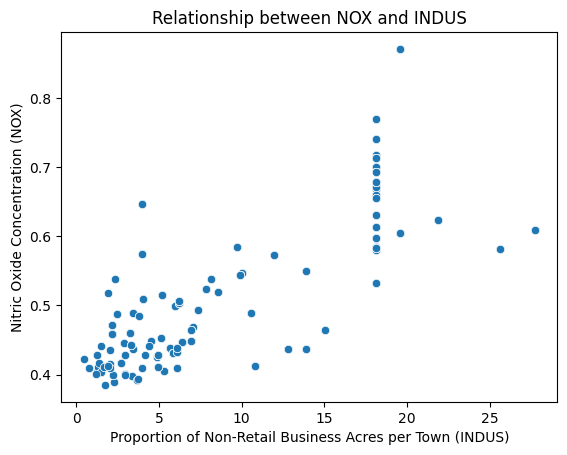

In [16]:
# Scatter plot of NOX vs INDUS
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

# Add plot labels
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.title('Relationship between NOX and INDUS')
pyplot.show()

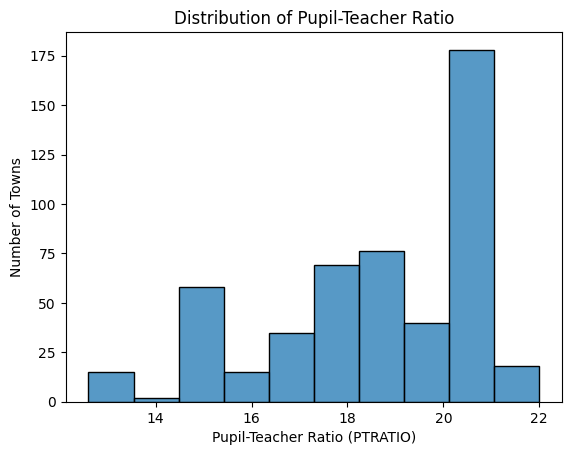

In [17]:
# Create a histogram for the PTRATIO variable
sns.histplot(data=boston_df, x='PTRATIO', bins=10, kde=False)

# Add plot labels
pyplot.xlabel('Pupil-Teacher Ratio (PTRATIO)')
pyplot.ylabel('Number of Towns')
pyplot.title('Distribution of Pupil-Teacher Ratio')
pyplot.show()

In [19]:
# Statistical Analysis

In [18]:
from scipy import stats

In [20]:
# T-test
# Split into two groups
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(medv_river, medv_no_river)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


In [21]:
# Fail to reject Null Hypotesis

In [22]:
# ANOVA
# Discretize AGE
bins = [0, 35, 70, 100]
labels = ['35 and younger', '35-70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Perform ANOVA
anova_model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


In [23]:
# We reject the Null Hypotesis, there is a statistically significant difference between Age group and MEDV

In [25]:
# Pearson Correlation:
corr_coef, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Correlation coefficient:", corr_coef)
print("P-value:", p_val)

Correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


In [27]:
# We reject the Null Hypotesis, there is a strong positive correlation between NOX group and INDUS

In [28]:
# Linear Regression
# Simple linear regression
reg_model = ols('MEDV ~ DIS', data=boston_df).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        11:23:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

In [29]:
# We reject the Null Hypotesis, there is a weak positive correlation between MEDV group and DIS